In [5]:
import modules.SimulacaoKTz as ktzsim
import numpy as np
import matplotlib.pyplot as plt


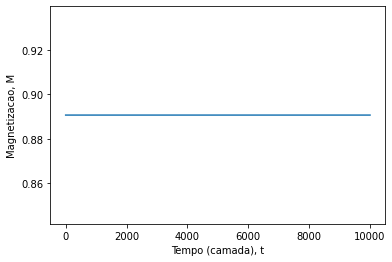

In [9]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = [1.0,1.0]
mapa_nome    = 'kttanh'



x       = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
t_dados = np.arange(x.shape[0])

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t_dados,x[:,0])
ax.set_xlabel('Tempo (camada), t')
ax.set_ylabel('Magnetizacao, M')
plt.show()


d:\Dropbox\p\ufsc\pesquisa\orientandos\2022_mestrado_constantino\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  arg  = (x[0] - K*x[1] + H) / T


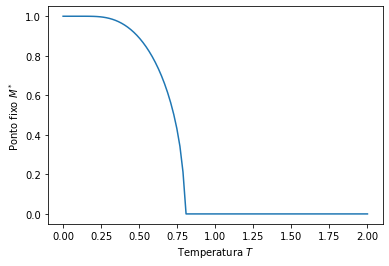

In [10]:
K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = [1.0,1.0]
mapa_nome    = 'kttanh'


def lineariza_lista(lst):
    return [ m for m_l in lst for m in m_l ]

T_valores = np.linspace(0,2,100)

x_dados = []
T_dados = []
for T in T_valores:
    x  = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
    x_unico = np.unique(x[:,0])
    x_dados.append(x_unico)
    T_dados.append(T * np.ones(x_unico.size))

T_dados = np.array(lineariza_lista(T_dados))
x_dados = np.array(lineariza_lista(x_dados))

plt.plot(T_dados,x_dados,'-')
plt.xlabel(r'Temperatura $T$')
plt.ylabel(r'Ponto fixo $M^*$')
plt.show()